In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
validate_emma = pd.read_csv('data/data_emma.csv')
validate_laura = pd.read_csv('data/data_laura.csv')
validate = pd.concat([validate_emma, validate_laura])
#parental = pd.read_csv('data/data_shared_parental.csv')
#quota = pd.read_csv('data/data_quota.csv')
#blinding = pd.read_csv('data/data_blinding.csv')

# Validating the model from 2016-2021

In [52]:
data_percent_women = {'2017': {'Level 6': 48, 'Level 5': 37, 'Level 4': 33, 'Level 3': 28, 'Level 2': 21, 'Level 1': 21},
             '2018': {'Level 6': 48, 'Level 5': 38, 'Level 4': 34, 'Level 3': 29, 'Level 2': 23, 'Level 1': 22},
             '2019': {'Level 6': 48, 'Level 5': 38, 'Level 4': 35, 'Level 3': 31, 'Level 2': 26, 'Level 1': 22},
             '2020': {'Level 6': 47, 'Level 5': 38, 'Level 4': 33, 'Level 3': 29, 'Level 2': 28, 'Level 1': 21},
             '2021': {'Level 6': 48, 'Level 5': 41, 'Level 4': 35, 'Level 3': 30, 'Level 2': 27, 'Level 1': 24}}

plot_data = pd.DataFrame.from_dict(data_percent_women, orient='index')


vali_plot = pd.DataFrame()

for i in np.unique(validate['tick']):
    for j in np.unique(validate['position']):
        dat = validate[(validate['tick'] == i) & (validate['position'] == j)]
        num_women = dat[dat['gender'] == 'female'].shape[0]
        num_agents =dat.shape[0]
        percent_women = num_women/num_agents * 100

        vali_plot = vali_plot.append({'percent_wom': percent_women, 'tick': i, 'position': j}, ignore_index=True)

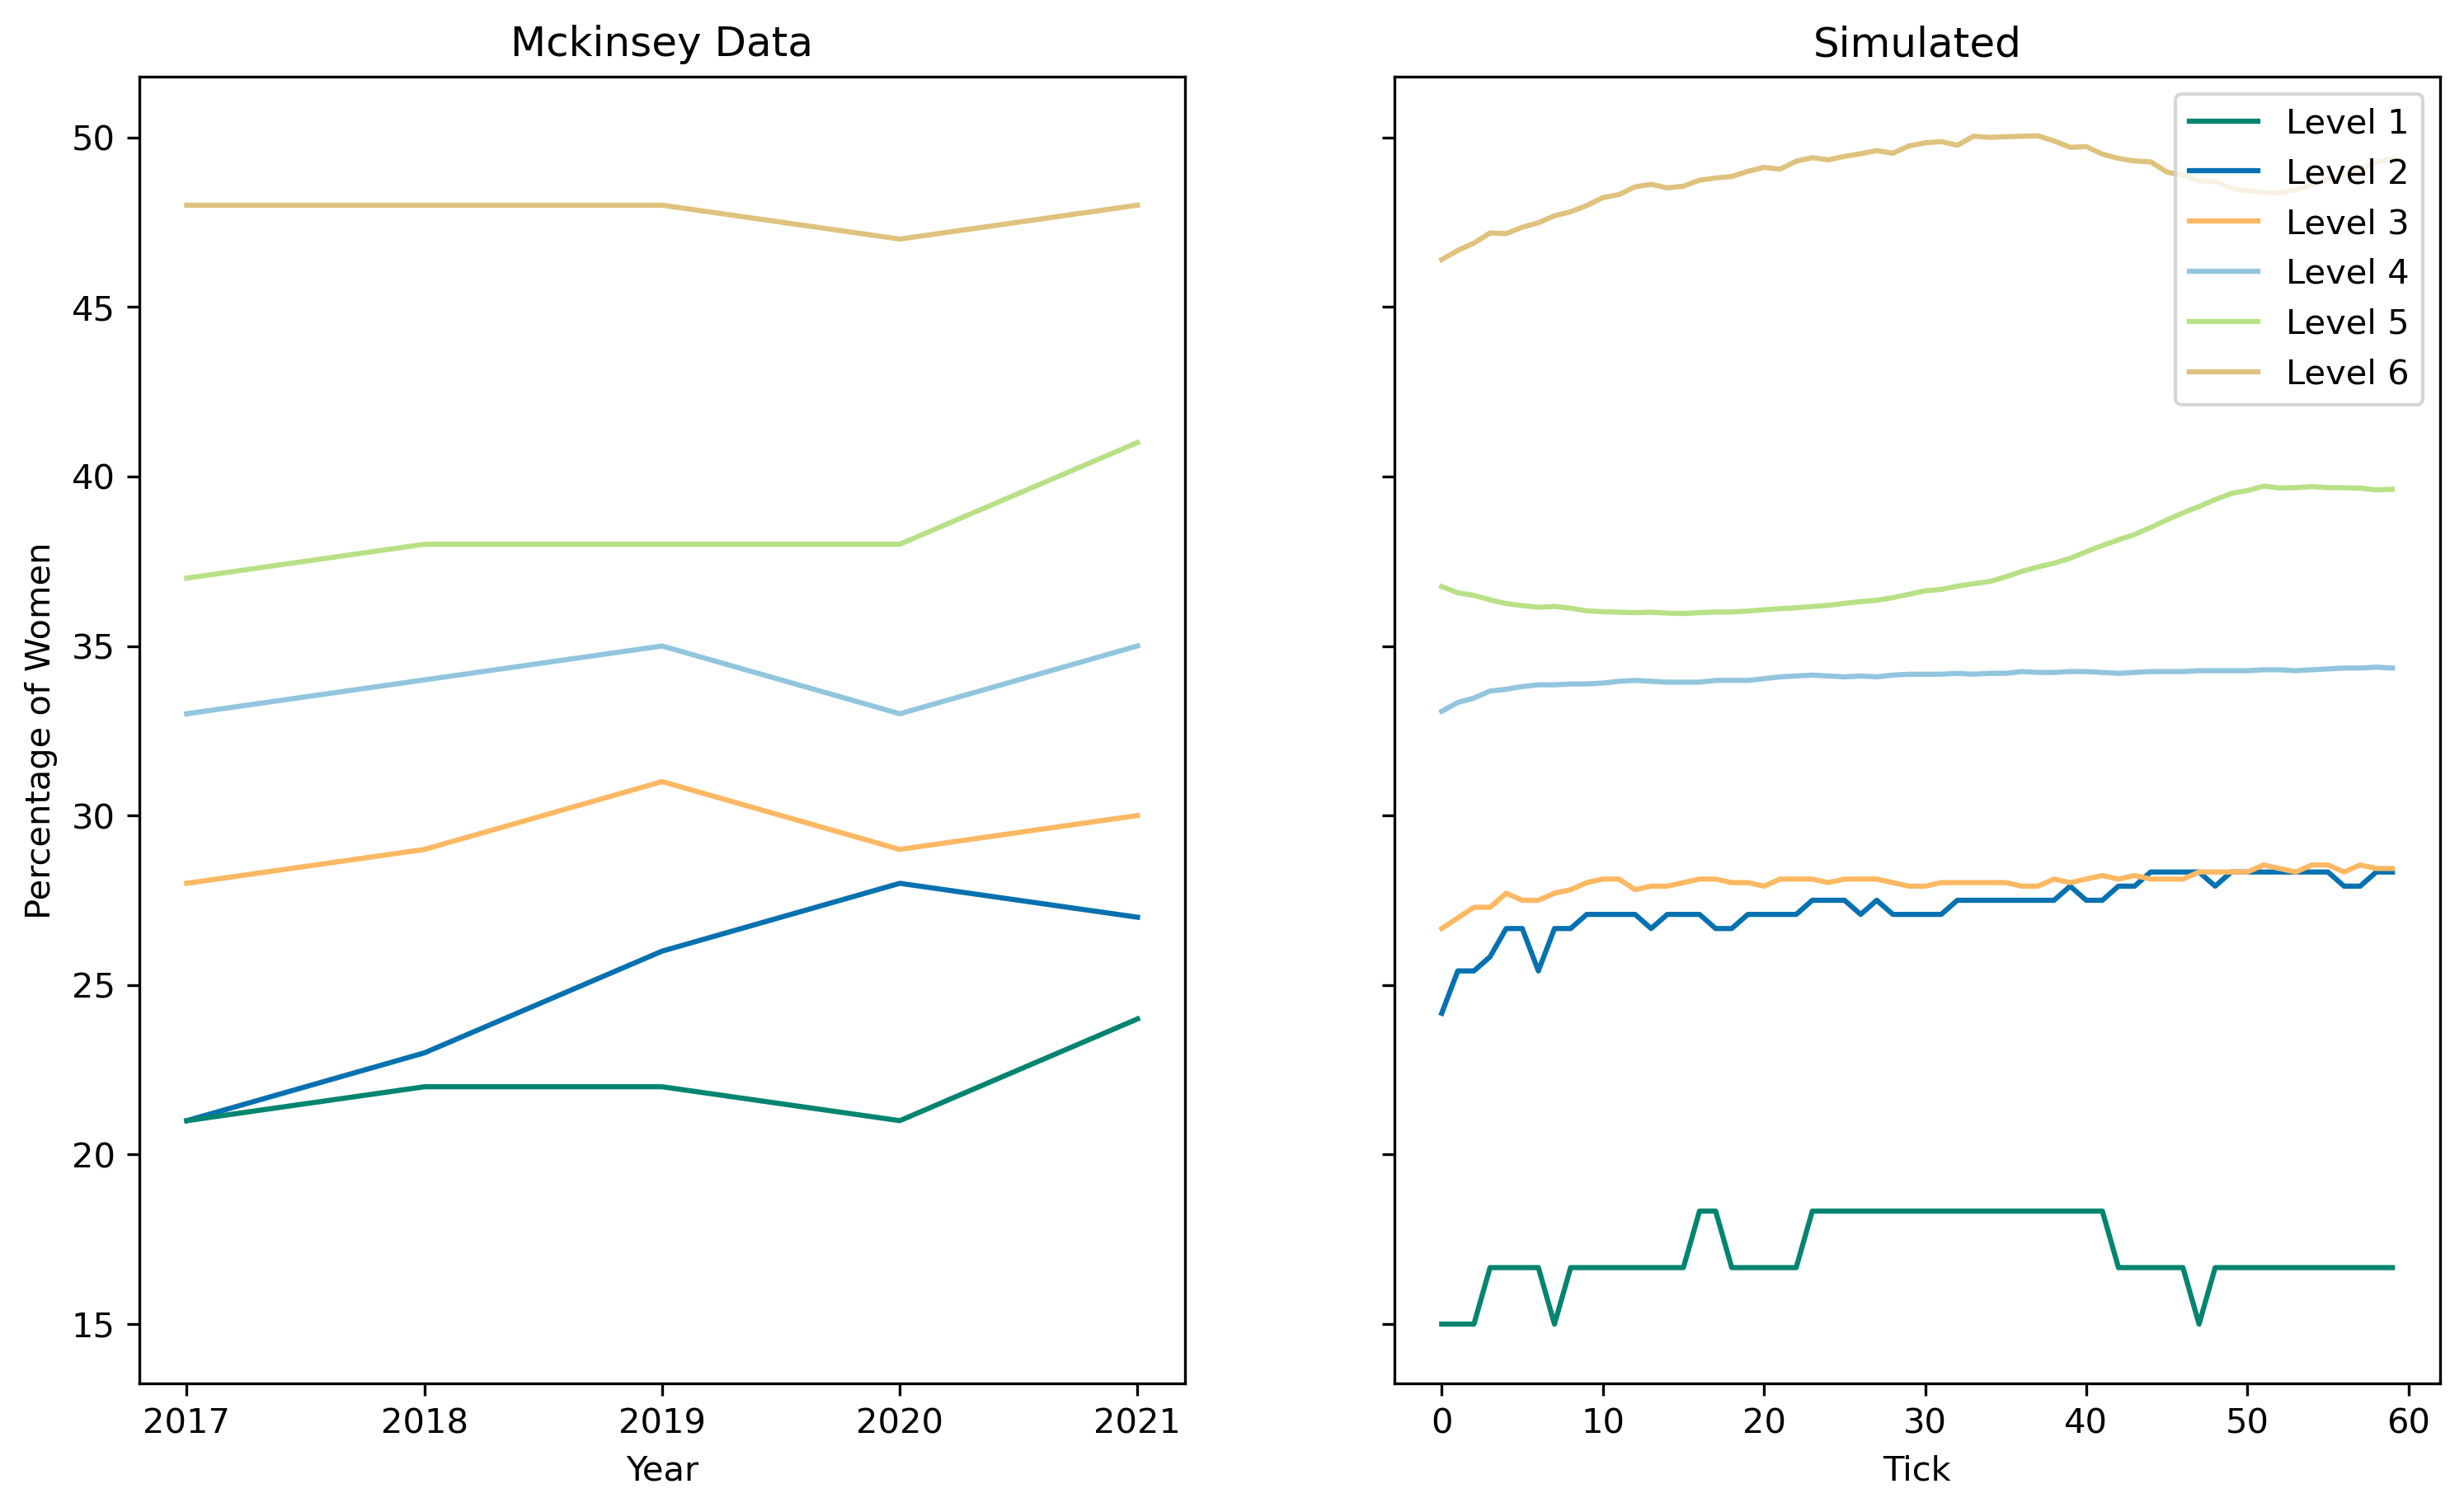

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7), dpi = 300, sharey = True)
colors ={'Level 1': '#018571', 'Level 2': '#0571B0','Level 3': '#FDB863','Level 4': '#92C5DE','Level 5': '#B8E186', 'Level 6':'#DFC27D'}
# Mckinsey data
for i in range(len(plot_data.columns)):
    ax[0].plot(plot_data.index, plot_data.iloc[:, i], label=plot_data.columns[i], color = colors[plot_data.columns[i]])
ax[0].set_title('Mckinsey Data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Percentage of Women')

# Simulated
for ind, i in enumerate(np.unique(vali_plot['position'])):
    ax[1].plot(vali_plot[vali_plot['position']==i].tick, vali_plot[vali_plot['position']==i].percent_wom, color = colors[i], label=i)
ax[1].set_title('Simulated')
ax[1].set_xlabel('Tick')
plt.legend()
plt.savefig('plots/percent_women_combined_emma_laura.png')